In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('DS_Sber.csv', sep=';')
data.columns = data.columns.str.lower()
data['reportdate'] = data['reportdate'].str.replace('.', '/')
data["reportdate"] = pd.to_datetime(data["reportdate"], infer_datetime_format=True)

data.head()

C:\Temp\ipykernel_1412\2780726826.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['reportdate'] = data['reportdate'].str.replace('.', '/')


,reportdate,value
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-01-02,3417092149
4,2014-01-03,3417092149


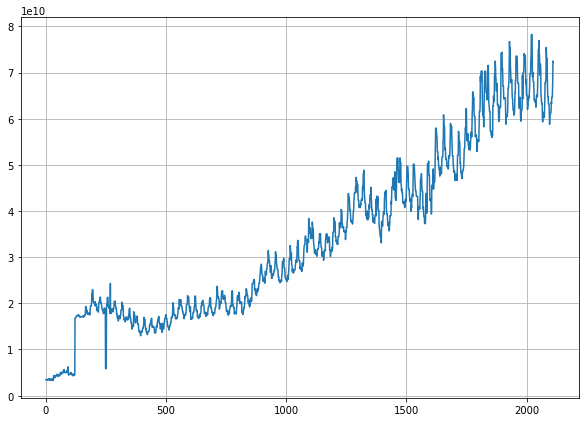

In [3]:
plt.figure(figsize=(10, 7))

plt.grid(True)
plt.plot(np.array([int(i) for i in range(1, len(data)+1)]), data.value)

plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [10]:
df = np.array(data.value.values)

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scale = scaler.fit_transform(df.reshape(-1, 1))

In [12]:
def create_dataset(df, window):
    x = []
    y = []
    for i in range(window, df.shape[0]):
        x.append(df[i-window:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return (x, y)

In [15]:
window = 30 * 1

x_train, y_train = create_dataset(train_scale, window)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape, y_train.shape

((2081, 30, 1), (2081,))

In [16]:
def create_model():
    model = Sequential(name='Sber')
    model.add(LSTM(units=16, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=1, activation='relu'))
    model.add(Dense(units=1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [17]:
model = create_model()

model.summary()

Model: "Sber"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 16)            1152      
                                                                 
 dropout (Dropout)           (None, 30, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1)                 72        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 1,226
Trainable params: 1,226
Non-trainable params: 0
_________________________________________________________________


In [19]:
df = np.array(data.value.values)

window = 30 * 1

for _ in range(window):
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scale = scaler.fit_transform(df.reshape(-1, 1))
    
    x_train, y_train = create_dataset(train_scale, window)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    model = create_model()
    model.fit(x_train, y_train, batch_size=16, epochs=50)
    
    predict = df[-window:]
    
    predict = scaler.transform(predict.reshape(-1, 1)).reshape(-1)
    
    predict = scaler.inverse_transform(model.predict(predict.reshape(1, window, 1))).reshape(-1)
        
    df = np.append(df, predict)
    
df[-window:]

Epoch 1/50
131/131 [==============================] - 3s 10ms/step - loss: 0.1868
Epoch 2/50
131/131 [==============================] - 1s 9ms/step - loss: 0.1203
Epoch 3/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0855
Epoch 4/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0699
Epoch 5/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0638
Epoch 6/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0618
Epoch 7/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0613
Epoch 8/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 9/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 10/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 11/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 12/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 13/50
131/131 [===

Epoch 1/50
131/131 [==============================] - 3s 10ms/step - loss: 0.1879
Epoch 2/50
131/131 [==============================] - 1s 9ms/step - loss: 0.1208
Epoch 3/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0857
Epoch 4/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0700
Epoch 5/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0638
Epoch 6/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0619
Epoch 7/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0613
Epoch 8/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0612
Epoch 9/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 10/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 11/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 12/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 13/50
131/131 [===

131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 1/50
131/131 [==============================] - 3s 10ms/step - loss: 0.0553
Epoch 2/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0098
Epoch 3/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0092
Epoch 4/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0075
Epoch 5/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0073
Epoch 6/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0065
Epoch 7/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0055
Epoch 8/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0045
Epoch 9/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 10/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 11/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0040
Epoch 12/50
131/131 [===============

131/131 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 42/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 43/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 44/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 45/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 46/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 47/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 48/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 49/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 50/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 1/50
131/131 [==============================] - 3s 9ms/step - loss: 0.0247
Epoch 2/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0043
Epoch 3/50
131/131 [==========

131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 33/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 34/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 35/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 36/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0611
Epoch 37/50
131/131 [==============================] - 1s 11ms/step - loss: 0.0611
Epoch 38/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0611
Epoch 39/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0611
Epoch 40/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0611
Epoch 41/50
131/131 [==============================] - 1s 11ms/step - loss: 0.0611
Epoch 42/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0611
Epoch 43/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0611
Epoch 44/50
131/131 [

Epoch 32/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 33/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 34/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 35/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 36/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 37/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 38/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 39/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 40/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 41/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 42/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 43/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 44/50
131/

Epoch 32/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 33/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 34/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 35/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 36/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 37/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 38/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 39/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 40/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 41/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 42/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 43/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0610
Epoch 44/50
131/

131/131 [==============================] - 1s 10ms/step - loss: 0.0609
Epoch 32/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0610
Epoch 33/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0609
Epoch 34/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0609
Epoch 35/50
131/131 [==============================] - 1s 11ms/step - loss: 0.0609
Epoch 36/50
131/131 [==============================] - 4s 28ms/step - loss: 0.0609
Epoch 37/50
131/131 [==============================] - 1s 10ms/step - loss: 0.0609
Epoch 38/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0609
Epoch 39/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0609
Epoch 40/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0609
Epoch 41/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0609
Epoch 42/50
131/131 [==============================] - 1s 9ms/step - loss: 0.0609
Epoch 43/50
131/131 [

131/131 [==============================] - 1s 7ms/step - loss: 0.0609
Epoch 31/50
131/131 [==============================] - 1s 6ms/step - loss: 0.0609
Epoch 32/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0609
Epoch 33/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0609
Epoch 34/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0609
Epoch 35/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0608
Epoch 36/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0608
Epoch 37/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0609
Epoch 38/50
131/131 [==============================] - 1s 6ms/step - loss: 0.0609
Epoch 39/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0609
Epoch 40/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0609
Epoch 41/50
131/131 [==============================] - 1s 7ms/step - loss: 0.0608
Epoch 42/50
131/131 [=======

132/132 [==============================] - 1s 9ms/step - loss: 0.0608
Epoch 30/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0608
Epoch 31/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0608
Epoch 32/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0608
Epoch 33/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0608
Epoch 34/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0608
Epoch 35/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0608
Epoch 36/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0608
Epoch 37/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0608
Epoch 38/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0608
Epoch 39/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0608
Epoch 40/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0608
Epoch 41/50
132/132

132/132 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 29/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 30/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0020
Epoch 31/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 32/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 33/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 34/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 35/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 36/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 37/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 38/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 39/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 40/50
132/132 [====

Epoch 28/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 29/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 30/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 31/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 32/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 33/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 34/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 35/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 36/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 37/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 38/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 39/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 40/50
132

132/132 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 28/50
132/132 [==============================] - 3s 21ms/step - loss: 0.0015
Epoch 29/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 30/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 31/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 32/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 33/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 34/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 35/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 36/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 37/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 38/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 39/50
132/132 [=====

132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 27/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 28/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 29/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 30/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 31/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0607
Epoch 32/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 33/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 34/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 35/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 36/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 37/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0606
Epoch 38/50
132/132 [=======

132/132 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 27/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 28/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0018
Epoch 29/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 30/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 31/50
132/132 [==============================] - 4s 27ms/step - loss: 0.0017
Epoch 32/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0016
Epoch 33/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 34/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0015
Epoch 35/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 36/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 37/50
132/132 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 38/50
132/13

132/132 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 27/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 28/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 29/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 30/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 31/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 32/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 33/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 34/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 35/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 36/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 37/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 38/50
132/132 [=======

array([3.43973396e+10, 6.10515681e+10, 3.44787395e+10, 3.45239101e+10,
       6.19705590e+10, 5.14070692e+10, 4.42268262e+10, 3.46071572e+10,
       4.18790113e+10, 3.44979374e+10, 4.34498437e+10, 3.43241093e+10,
       3.42303437e+10, 3.44014684e+10, 3.85494016e+10, 3.44955412e+10,
       4.73954591e+10, 3.42211973e+10, 4.74814996e+10, 3.75752581e+10,
       3.46510459e+10, 3.97852262e+10, 3.17726945e+10, 3.64456264e+10,
       3.88772864e+10, 3.42757212e+10, 3.65665485e+10, 3.78639565e+10,
       3.27276360e+10, 3.66359962e+10])

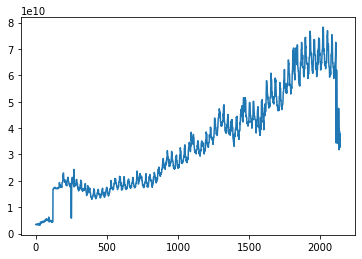

In [20]:
plt.plot(df)